In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

import pickle

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_excel('/kaggle/input/xtern-ai/XTern 2024 Artificial Intelegence Data Set.xlsx')
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [3]:
print('Shape of Data:', df.shape)

Shape of Data: (5000, 5)


In [4]:
print('Null Values in Data:', df.isnull().values.any())

Null Values in Data: False


In [5]:
print('Total No. of Unique Values in Each Column:')
print(df.nunique())

Total No. of Unique Values in Each Column:
Year           4
Major         20
University    10
Time          10
Order         10
dtype: int64


In [6]:
columns = list(df.columns.values)
for column in columns:
  print(column, end=": ")
  print(df[column].unique())

Year: ['Year 2' 'Year 3' 'Year 1' 'Year 4']
Major: ['Physics' 'Chemistry' 'Biology' 'Business Administration' 'Anthropology'
 'Mathematics' 'Economics' 'Astronomy' 'Marketing' 'Political Science'
 'Finance' 'Sociology' 'Accounting' 'Psychology' 'International Business'
 'Music' 'Mechanical Engineering' 'Philosophy' 'Fine Arts'
 'Civil Engineering']
University: ['Indiana State University' 'Ball State University' 'Butler University'
 'Indiana University-Purdue University Indianapolis (IUPUI)'
 'University of Notre Dame' 'University of Evansville'
 'Valparaiso University' 'Purdue University'
 'Indiana University Bloomington' 'DePauw University']
Time: [12 14 11 15 13 17  9 10 16  8]
Order: ['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Indiana Buffalo Chicken Tacos (3 tacos)' 'Sweet Potato Fries'
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Breaded Pork Tenderloin Sandwich' 'Cornbread Hush Puppies'


In [7]:
print('General Statistics of the Data:')
print(df.info())

General Statistics of the Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB
None


In [8]:
px.pie(df,names='Year',title='Distribution of Years',hole=0.2)

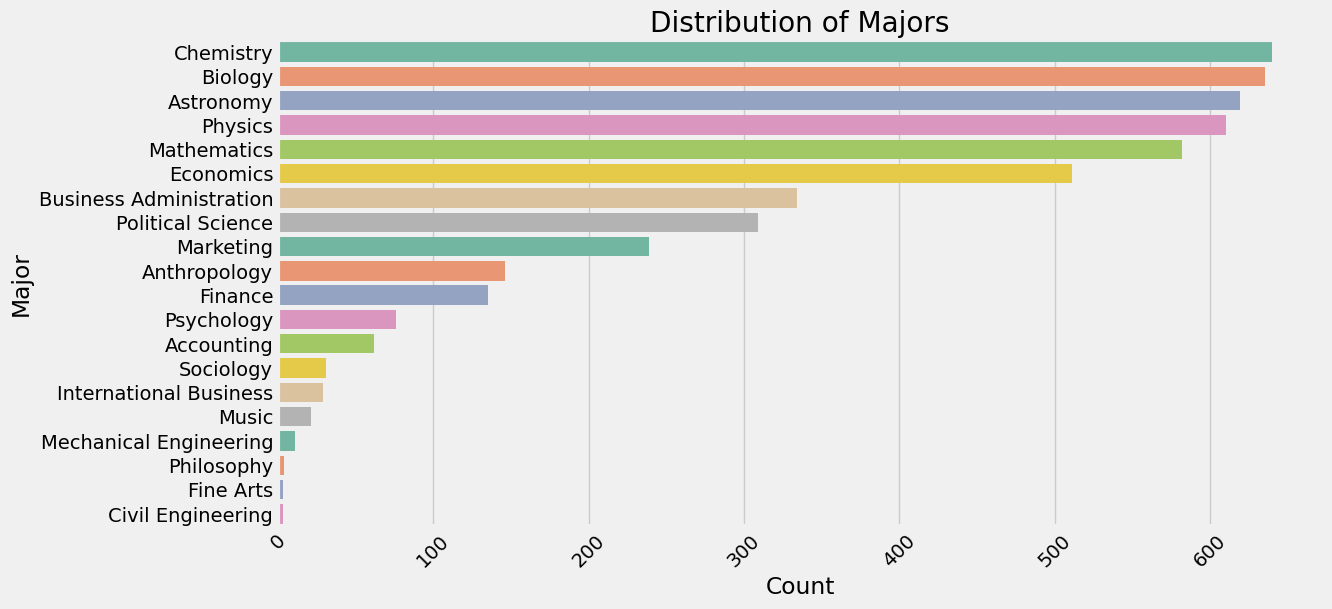

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Major", order=df["Major"].value_counts().index, palette="Set2")
plt.title("Distribution of Majors")
plt.xlabel("Count")
plt.ylabel("Major")
plt.xticks(rotation=45)
plt.show()

In [10]:
px.pie(df,names='University',title='Distribution of Universities',hole=0.2)

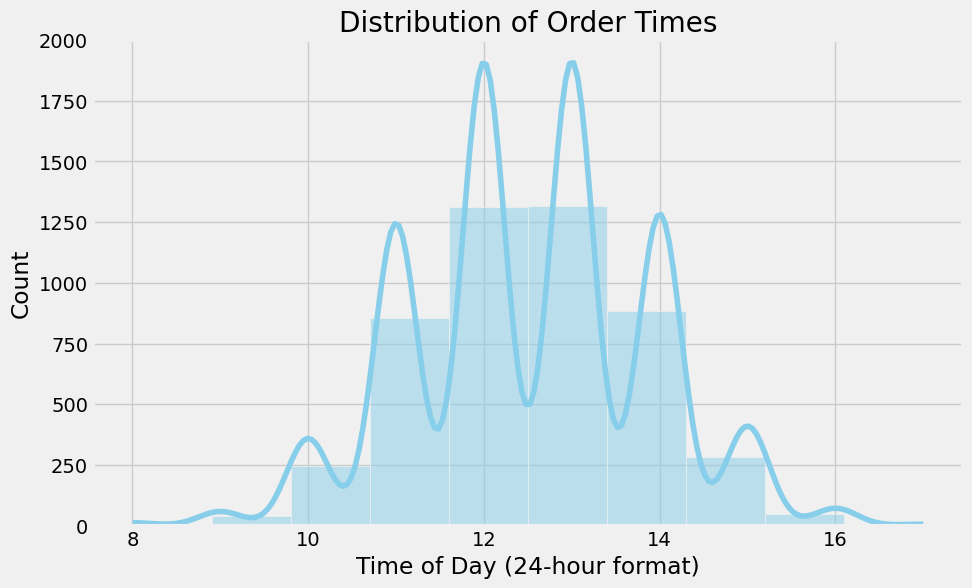

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Time", bins=10, kde=True, color="skyblue")
plt.title("Distribution of Order Times")
plt.xlabel("Time of Day (24-hour format)")
plt.ylabel("Count")
plt.show()

In [12]:
px.pie(df,names='Order',title='Food Orders',hole=0.2)

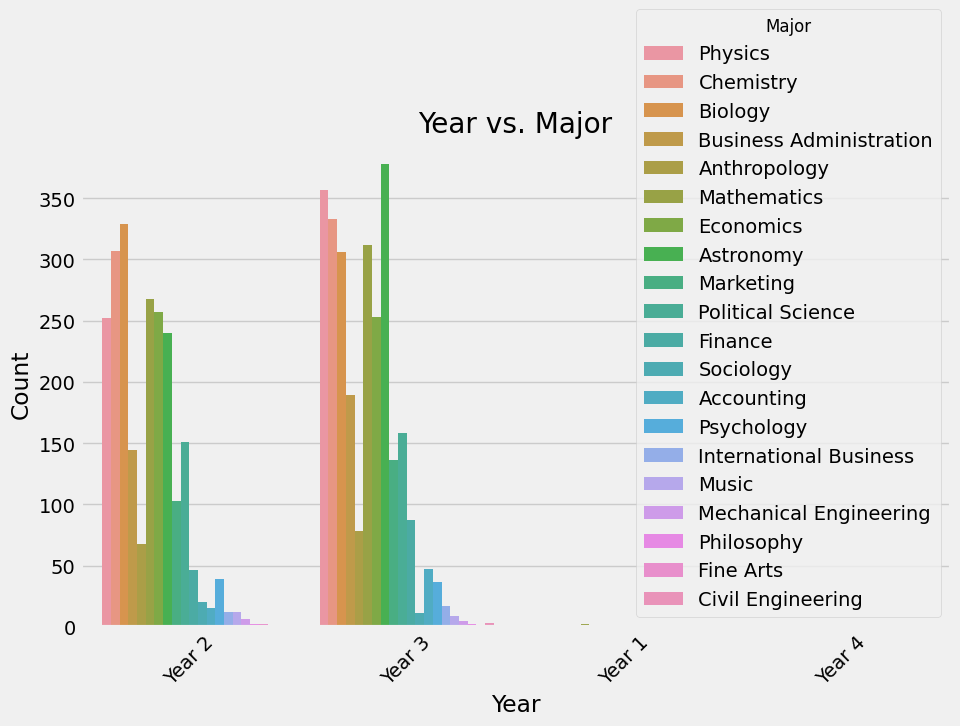

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Year", hue="Major")
plt.title("Year vs. Major")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Major", title_fontsize='12')
plt.show()

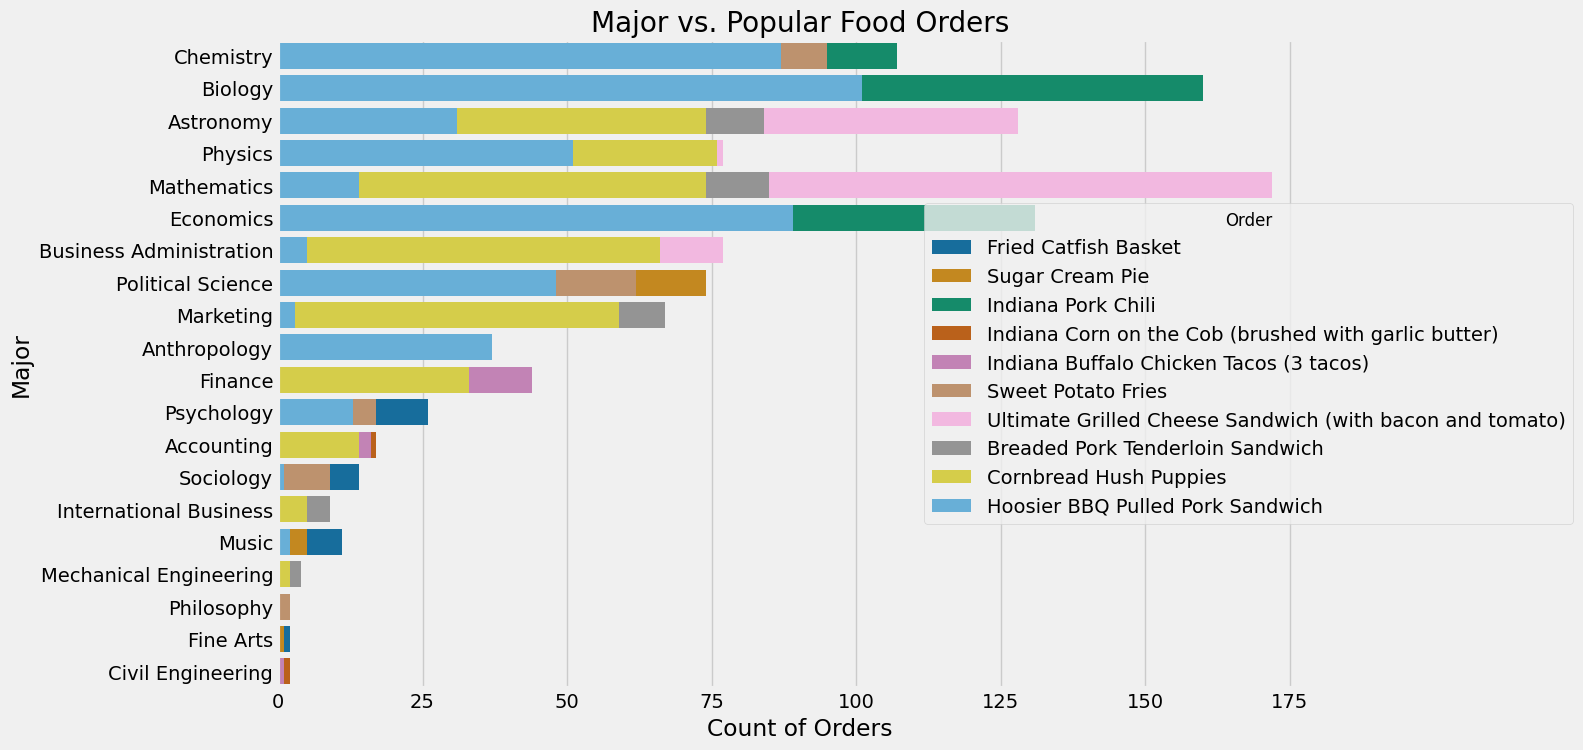

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y="Major", hue="Order", order=df["Major"].value_counts().index, dodge=False, palette="colorblind")

plt.title("Major vs. Popular Food Orders")
plt.ylabel("Major")
plt.xlabel("Count of Orders")
plt.legend(title="Order", title_fontsize='12', loc="center right", bbox_to_anchor=(1.25, 0.5))

plt.show()

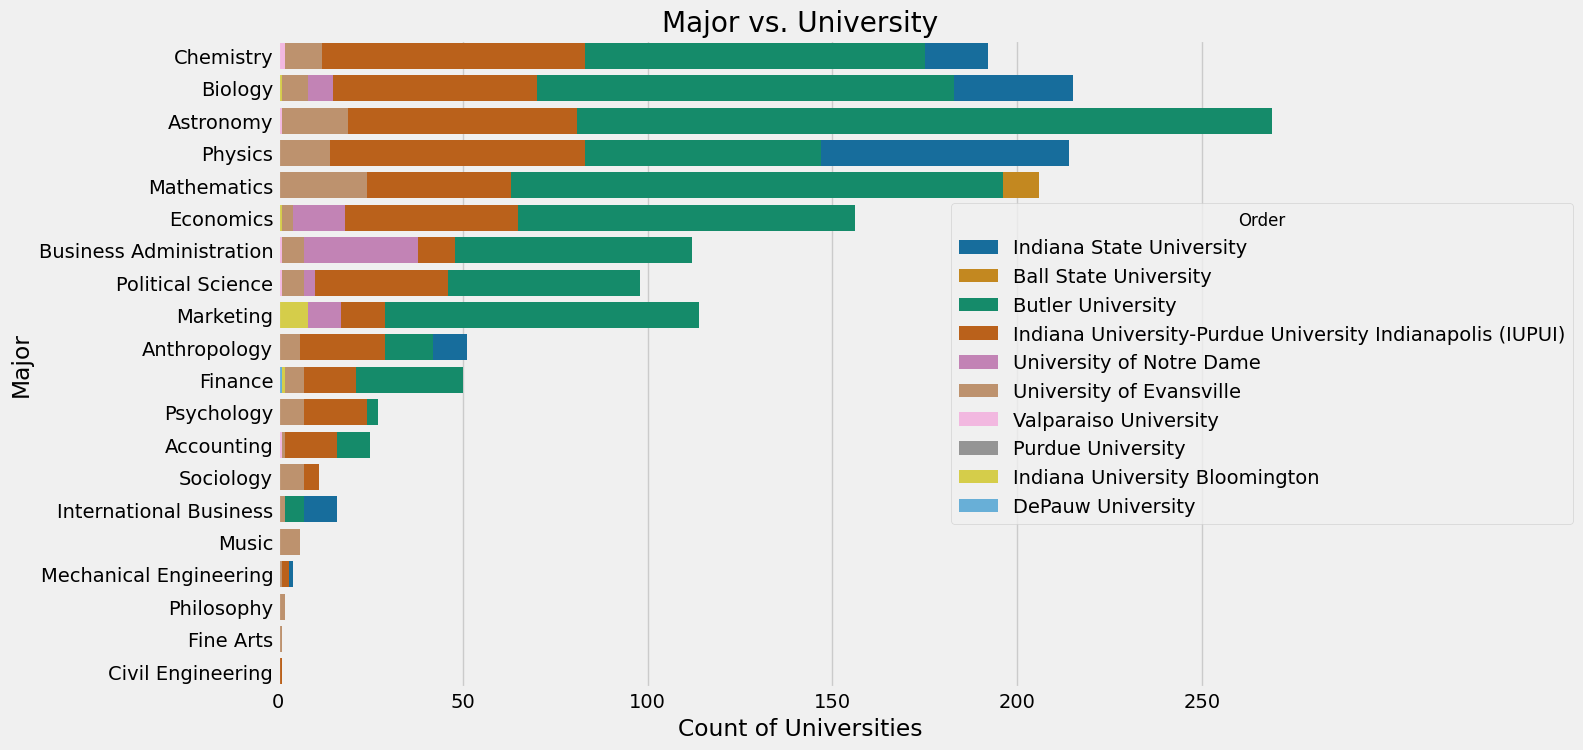

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y="Major", hue="University", order=df["Major"].value_counts().index, dodge=False, palette="colorblind")

plt.title("Major vs. University")
plt.ylabel("Major")
plt.xlabel("Count of Universities")
plt.legend(title="Order", title_fontsize='12', loc="center right", bbox_to_anchor=(1.25, 0.5))

plt.show()

In [16]:
def prepare_data(file_path):
    # Load the dataset
    data = pd.read_excel('/kaggle/input/xtern-ai/XTern 2024 Artificial Intelegence Data Set.xlsx')

    # Encode categorical features
    label_encoders = {}
    categorical_features = ['Year', 'Major', 'University', 'Time', 'Order']
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = le

    # Split the data into features and target
    X = data.drop(['Order'], axis=1)
    y = data['Order']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

    return X_train, X_test, y_train, y_test, label_encoders

In [17]:
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42, n_estimators=512)
    model.fit(X_train, y_train)
    return model

In [18]:
def save_model(model, file_path):
    with open(file_path, 'wb') as model_file:
        pickle.dump(model, model_file)

In [19]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [20]:
# Load and prepare data
X_train, X_test, y_train, y_test, label_encoders = prepare_data('/kaggle/input/xtern-ai/XTern 2024 Artificial Intelegence Data Set.xlsx')

# Train the model
model = train_model(X_train, y_train)

# Save the model
save_model(model, 'rf.pkl')

# Test the model
accuracy, report = test_model(model, X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.53      0.61       106
           1       0.54      0.62      0.57        94
           2       0.68      0.58      0.62        83
           3       0.66      0.74      0.70       105
           4       0.64      0.48      0.55        97
           5       0.72      0.85      0.78       101
           6       0.75      0.89      0.81       102
           7       0.69      0.63      0.66       116
           8       0.63      0.54      0.58        97
           9       0.65      0.78      0.71        99

    accuracy                           0.67      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.67      0.67      0.66      1000

